# Linear Regression


In [89]:
import numpy as np
import sympy as sym

In [90]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


$$ f(x) = x^4-4x^3+2 $$

In [91]:
f=lambda x: x**4-4*x**3+2

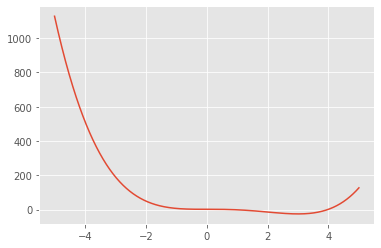

In [92]:
x=np.linspace(-5,5,1000)
y= f(x)
plt.plot(x,y)

### Brute-force Search
Lets do a brute-force search for the given variable in the limit.

In [93]:
minimum=+np.inf
mx=+np.inf

# Your code here

print("Local minimum occurs at {}".format(mx))

Local minimum occurs at inf


### Gradient Descent

In [94]:
def f_derivative(f):
    # Your code here
    # Calculate the derivative and write your code here
    return sym.diff(f)

In [95]:
x_old = 0
x_new = np.random.rand(1,1) 
eps = 0.01 # step size
precision = 0.00001

# Your code here

print ("Local minimum occurs at", x_new)

Local minimum occurs at [[0.77524489]]


#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


#### Lets Check

In [96]:
eps=0.00001
x=1.5
dfx=(f(x+eps)-f(x))/eps
cdfx=f_derivative(x)

print (dfx, cdfx, dfx-cdfx)

-13.500044999936732 0 -13.5000449999367


### Let's generate some random data

In [97]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y

Text(0, 0.5, 'Y')

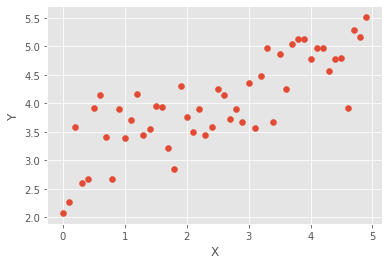

In [98]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

### Let's visualize our solution space

In [99]:
cf=lambda t0,t1,x,y: np.dot(t1*x+t0-y,t1*x+t0-y)
#square error

In [100]:
t0=arange(-5,+5,0.01)
t1=arange(-5,+5,0.01)

In [101]:
ecf=np.zeros((len(t0),len(t1)))

for i in range(len(t0)):
    for j in range(len(t1)):
        ecf[i,j]=cf(t0[i],t1[j],X,Y)

In [102]:
print (ecf)

[[25677.22633862 25613.85975657 25550.57693729 ...  2644.38232815
   2661.62473567  2678.94713073]
 [25655.98300977 25592.64084124 25529.38241119 ...  2647.56588198
   2664.83278707  2682.17968925]
 [25634.74963327 25571.43229164 25508.19857224 ...  2650.75946307
   2668.05084845  2685.42226257]
 ...
 [ 9462.99708244  9424.05735435  9385.20027957 ... 10783.37205352
  10825.04175003 10866.78985663]
 [ 9451.72380512  9412.80858967  9373.9760032  ... 10796.52583513
  10838.22003292 10879.99263935]
 [ 9440.46069555  9401.57002155  9362.76195988 ... 10809.689371
  10851.40793207 10893.20517065]]


In [104]:
# Generate theta_0 and theta_1 values for the cost function...
tX, tY = np.meshgrid(t0, t1)
print (tX.shape, tY.shape)

(1000, 1000) (1000, 1000)


In [105]:
print (ecf.shape)

(1000, 1000)


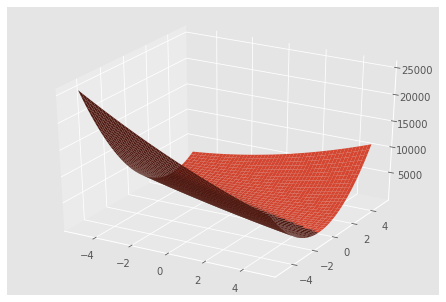

In [106]:
#Plot the cost function...
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(tX,tY,ecf.T)
# ax.set_xlabel(r'$\theta_0$(Intercept)')
# ax.set_ylabel(r'$\theta_1$(Slope)')
# ax.set_zlabel(r'$J(\theta_0,\theta_1)$(Cost Function)')

### Time for our regression implementation

$$
h(X, \theta) = X^T . \theta
$$

In [107]:
def hyp(theta, X):
    # Your code here
    #take dot product
    transX=np.transpose(X)
    return np.dot(X,theta)

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [108]:
def cost_function(theta,X,Y):
    # Your code here
    #hyp-Y whole square and sum and divide by 2 and return it
    m=len(Y)
    hypothesis=hyp(theta,X)
    
    mse = np.sum((hypothesis - Y)**2)
    # root mean squared error
    # m is the number of training examples
    #rmse = np.sqrt(mse/m)
    
    return mse/(m*2) #(1/2*m) * np.sum(np.square(hypothesis-Y))

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [109]:
def derivative_cost_function(theta,X,Y):
    nexamples=float(X.shape[0])
    # Your code here 
    # take x product and divide by n of cost_function
    hypothesis=hyp(theta,X)
    res=np.dot((hypothesis-Y).T,X)
    dtheta=(res/nexamples)
    return dtheta.T

In [110]:
print (X.shape)
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print (nx.shape)

(50,)
(50, 2)


In [111]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print (thetas)

[0.5881308  0.89771373]


In [112]:
cf=cost_function(thetas,nx,Y)
print (cf)

1.509827527839499


In [113]:
ad=derivative_cost_function(thetas,nx,Y)
print (ad)

[-3.77643884 -1.65938466]


In [114]:
#Gradient Descent...
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxniter=20000):
    #Calculate the hypothesis h = X * theta
    #Calculate the loss = h - y and maybe the squared cost (loss^2)/2m 
    #Calculate the gradient = X' * loss / m
    #Update the parameters theta = theta - alpha * gradient
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],)
    eps=0.00001
    alpha=0.01
    cf=[]
    numiter=0
    m=len(Y)
    for numiter in range(0,maxniter):
        hypothesis=hyp(thetas,X)
        loss=hypothesis-Y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(X.T, loss) / m
        thetas = thetas - alpha * gradient
        
        
    
    # Your code here
    
    return thetas

In [115]:
theta_new=GradientDescent(nx,Y,cost_function,derivative_cost_function) 
theta_new

array([0.44932953, 2.89716151])

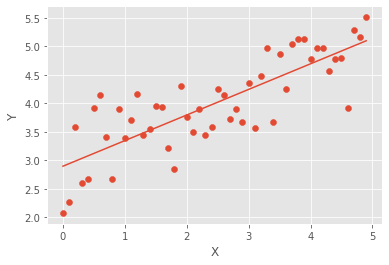

In [116]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new))